In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
df=pd.read_csv("/content/loan_data.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
df.dropna()

person_age person_gender person_education  person_income  \
0            22.0        female           Master        71948.0   
1            21.0        female      High School        12282.0   
2            25.0        female      High School        12438.0   
3            23.0        female         Bachelor        79753.0   
4            24.0          male           Master        66135.0   
...           ...           ...              ...            ...   
44995        27.0          male        Associate        47971.0   
44996        37.0        female        Associate        65800.0   
44997        33.0          male        Associate        56942.0   
44998        29.0          male         Bachelor        33164.0   
44999        24.0          male      High School        51609.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT    35000.0           PERSONAL   
1                   0                   OWN     1000.0          EDUCATION   
2                   3              MORTGAGE     5500.0            MEDICAL   
3                   0                  RENT    35000.0            MEDICAL   
4                   1                  RENT    35000.0            MEDICAL   
...               ...                   ...        ...                ...   
44995               6                  RENT    15000.0            MEDICAL   
44996              17                  RENT     9000.0    HOMEIMPROVEMENT   
44997               7                  RENT     2771.0  DEBTCONSOLIDATION   
44998               4                  RENT    12000.0          EDUCATION   
44999               1                  RENT     6665.0  DEBTCONSOLIDATION   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0              16.02                 0.49                         3.0   
1              11.14                 0.08                         2.0   
2              12.87                 0.44                         3.0   
3              15.23                 0.44                         2.0   
4              14.27                 0.53                         4.0   
...              ...                  ...                         ...   
44995          15.66                 0.31                         3.0   
44996          14.07                 0.14                        11.0   
44997          10.02                 0.05                        10.0   
44998          13.23                 0.36                         6.0   
44999          17.05                 0.13                         3.0   

       credit_score previous_loan_defaults_on_file  loan_status  
0               561                             No            1  
1               504                            Yes            0  
2               635                             No            1  
3               675                             No            1  
4               586                             No            1  
...             ...                            ...          ...  
44995           645                             No            1  
44996           621                             No            1  
44997           668                             No            1  
44998           604                             No            1  
44999           628                             No            1  

[45000 rows x 14 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
import plotly.express as px
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
import plotly.express as px

# Iterate through columns and check if they are numerical
for i in df.columns:
    if df[i].dtype in ['int64', 'float64']:  # Check for numerical columns
        # Create a histogram with color based on 'lon_status'
        fig = px.histogram(df, x=i, color='loan_status', title=f"Histogram of {i} by Lon Status")
        fig.show()


In [ ]:
import plotly.express as px

# Iterate through columns and check if they are numerical
for i in df.columns:
    if df[i].dtype in ['object']:  # Check for numerical columns
        # Create a histogram with color based on 'lon_status'
        fig = px.histogram(df, x=i, color='loan_status', title=f"Histogram of {i} by Lon Status")
        fig.show()

In [ ]:
for i in df.columns:
    if df[i].dtype in ['int64', 'float64']:  # Check for numerical columns
        # Create a violin plot with color based on 'loan_status'
        fig = px.violin(df, y=i, color='loan_status', title=f"Violin Plot of {i} by Loan Status")
        fig.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df,test_df=train_test_split(df,test_size=0.2,random_state=42)
train_df,val_df=train_test_split(train_df,test_size=0.25,random_state=42)

In [ ]:
train_df.shape,val_df.shape,test_df.shape

((27000, 14), (9000, 14), (9000, 14))

In [ ]:
input_cols=df.columns[:-1]
target_col=df.columns[-1]
target_col

'loan_status'

In [ ]:
numerical_cols=[]
categorical_cols=[]
for i in input_cols:
  if df[i].dtype in ['int64','float']:
    numerical_cols.append(i)
  else:
    categorical_cols.append(i)


In [ ]:
print(numerical_cols)
print(categorical_cols)

['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']


In [ ]:
train_input=train_df[input_cols].copy()
train_target=train_df[target_col].copy()
test_input=test_df[input_cols].copy()
test_target=test_df[target_col].copy()

val_input=val_df[input_cols].copy()
val_target=val_df[target_col].copy()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scalar=MinMaxScaler()

In [ ]:
scalar.fit(df[numerical_cols])

MinMaxScaler()

In [ ]:
scalar.data_max_

array([1.440000e+02, 7.200766e+06, 1.250000e+02, 3.500000e+04,
       2.000000e+01, 6.600000e-01, 3.000000e+01, 8.500000e+02])

In [ ]:
scalar.data_min_

array([2.00e+01, 8.00e+03, 0.00e+00, 5.00e+02, 5.42e+00, 0.00e+00,
       2.00e+00, 3.90e+02])

In [ ]:
df.describe()

person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25%         8.590000             0.070000                    3.000000   
50%        11.010000             0.120000                    4.000000   
75%        12.990000             0.190000                    8.000000   
max        20.000000             0.660000                   30.000000   

       credit_score   loan_status  
count  45000.000000  45000.000000  
mean     632.608756      0.222222  
std       50.435865      0.415744  
min      390.000000      0.000000  
25%      601.000000      0.000000  
50%      640.000000      0.000000  
75%      670.000000      0.000000  
max      850.000000      1.000000

In [ ]:
numerical_cols

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score']

In [ ]:
input_cols

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
train_input[numerical_cols]=scalar.transform(train_input[numerical_cols])
test_input[numerical_cols]=scalar.transform(test_input[numerical_cols])
val_input[numerical_cols]=scalar.transform(val_input[numerical_cols])

In [ ]:
train_input[numerical_cols].describe()

person_age  person_income  person_emp_exp     loan_amnt  \
count  27000.000000   27000.000000    27000.000000  27000.000000   
mean       0.062284       0.010080        0.042847      0.263408   
std        0.048126       0.011381        0.047858      0.183519   
min        0.000000       0.000000        0.000000      0.000000   
25%        0.032258       0.005430        0.008000      0.130435   
50%        0.048387       0.008212        0.032000      0.217391   
75%        0.080645       0.012169        0.064000      0.340210   
max        1.000000       0.771386        1.000000      1.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   27000.000000         27000.000000                27000.000000   
mean        0.382959             0.211960                    0.136872   
std         0.205543             0.132189                    0.136717   
min         0.000000             0.000000                    0.000000   
25%         0.214678             0.106061                    0.035714   
50%         0.383402             0.181818                    0.071429   
75%         0.524005             0.287879                    0.214286   
max         1.000000             0.954545                    1.000000   

       credit_score  
count  27000.000000  
mean       0.527834  
std        0.109363  
min        0.000000  
25%        0.460870  
50%        0.543478  
75%        0.608696  
max        0.906522

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore').fit(df[categorical_cols])

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
encoded_cols

['person_gender_female',
 'person_gender_male',
 'person_education_Associate',
 'person_education_Bachelor',
 'person_education_Doctorate',
 'person_education_High School',
 'person_education_Master',
 'person_home_ownership_MORTGAGE',
 'person_home_ownership_OTHER',
 'person_home_ownership_OWN',
 'person_home_ownership_RENT',
 'loan_intent_DEBTCONSOLIDATION',
 'loan_intent_EDUCATION',
 'loan_intent_HOMEIMPROVEMENT',
 'loan_intent_MEDICAL',
 'loan_intent_PERSONAL',
 'loan_intent_VENTURE',
 'previous_loan_defaults_on_file_No',
 'previous_loan_defaults_on_file_Yes']

In [ ]:
train_input[encoded_cols] = encoder.transform(train_input[categorical_cols]).toarray()
val_input[encoded_cols] = encoder.transform(val_input[categorical_cols]).toarray()
test_input[encoded_cols] = encoder.transform(test_input[categorical_cols]).toarray()

In [ ]:
train_input.head()

person_age person_gender person_education  person_income  \
7311     0.016129          male        Associate       0.005035   
19380    0.104839        female        Associate       0.002857   
17838    0.064516          male         Bachelor       0.012359   
21116    0.072581        female      High School       0.006563   
9428     0.016129        female        Associate       0.009384   

       person_emp_exp person_home_ownership  loan_amnt loan_intent  \
7311             0.00                  RENT   0.173913    PERSONAL   
19380            0.08                  RENT   0.072464    PERSONAL   
17838            0.00                  RENT   1.000000   EDUCATION   
21116            0.08                   OWN   0.565217     VENTURE   
9428             0.00              MORTGAGE   0.275362   EDUCATION   

       loan_int_rate  loan_percent_income  ...  person_home_ownership_OWN  \
7311        0.383402             0.227273  ...                        0.0   
19380       0.549383             0.166667  ...                        0.0   
17838       0.699588             0.545455  ...                        0.0   
21116       0.356653             0.545455  ...                        1.0   
9428        0.039095             0.196970  ...                        0.0   

       person_home_ownership_RENT loan_intent_DEBTCONSOLIDATION  \
7311                          1.0                           0.0   
19380                         1.0                           0.0   
17838                         1.0                           0.0   
21116                         0.0                           0.0   
9428                          0.0                           0.0   

       loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  \
7311                     0.0                          0.0   
19380                    0.0                          0.0   
17838                    1.0                          0.0   
21116                    0.0                          0.0   
9428                     1.0                          0.0   

       loan_intent_MEDICAL  loan_intent_PERSONAL  loan_intent_VENTURE  \
7311                   0.0                   1.0                  0.0   
19380                  0.0                   1.0                  0.0   
17838                  0.0                   0.0                  0.0   
21116                  0.0                   0.0                  1.0   
9428                   0.0                   0.0                  0.0   

       previous_loan_defaults_on_file_No  previous_loan_defaults_on_file_Yes  
7311                                 1.0                                 0.0  
19380                                1.0                                 0.0  
17838                                1.0                                 0.0  
21116                                0.0                                 1.0  
9428                                 0.0                                 1.0  

[5 rows x 32 columns]

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression(solver='liblinear')

In [ ]:
model.fit(train_input[numerical_cols+encoded_cols],train_target)

LogisticRegression(solver='liblinear')

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
X_train=train_input[numerical_cols+encoded_cols]
X_val=val_input[numerical_cols+encoded_cols]
X_test=test_input[numerical_cols+encoded_cols]

In [ ]:
pred_train=model.predict(X_train)
pred_val=model.predict(X_val)
pred_test=model.predict(X_test)

In [ ]:
prob_train=model.predict_proba(X_train)
prob_val=model.predict_proba(X_val)
prob_test=model.predict_proba(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
confusion_matrix(train_target,pred_train)

array([[19741,  1276],
       [ 1510,  4473]])

In [ ]:
accuracy_score(train_target, pred_train)

0.8968148148148148

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 89.73%


array([0, 0, 0, ..., 0, 0, 0])

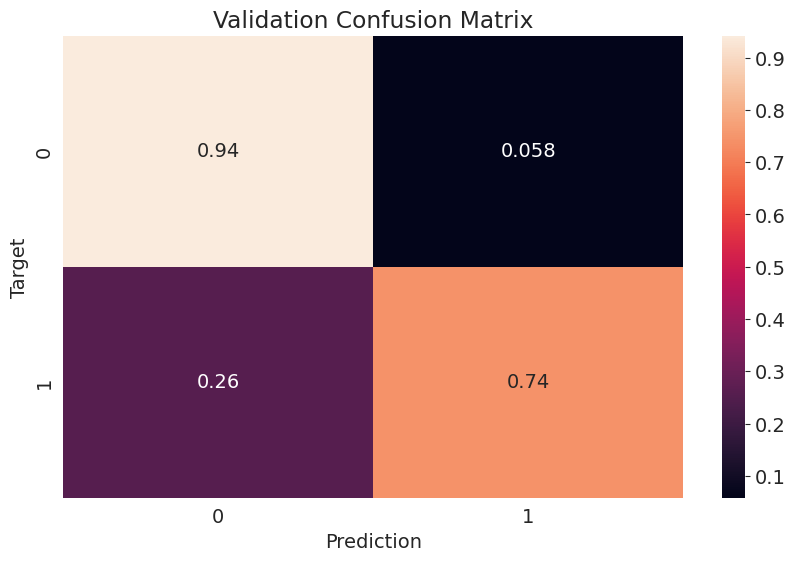

In [ ]:
predict_and_plot(val_input[numerical_cols+encoded_cols], val_target, 'Validation')

Accuracy: 89.32%


array([0, 0, 1, ..., 0, 1, 1])

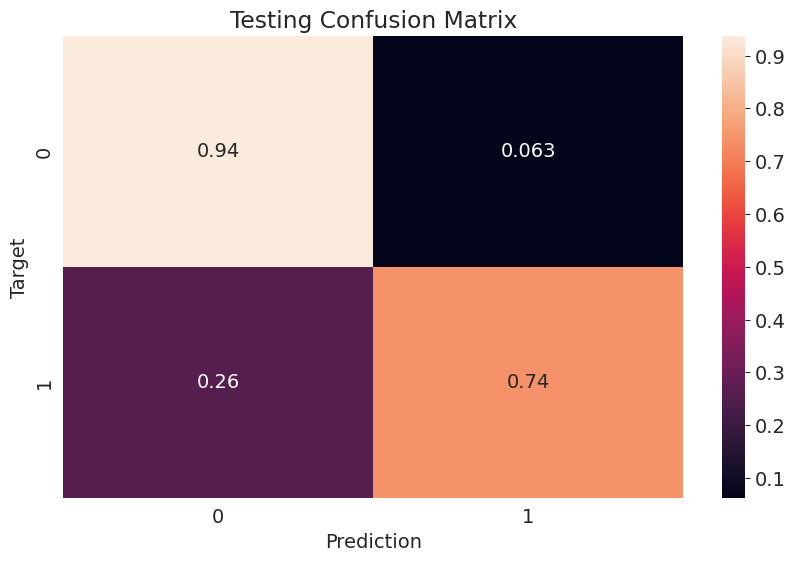

In [ ]:
predict_and_plot(test_input[numerical_cols+encoded_cols],test_target,'Testing')

Accuracy: 89.68%


array([1, 1, 1, ..., 0, 0, 0])

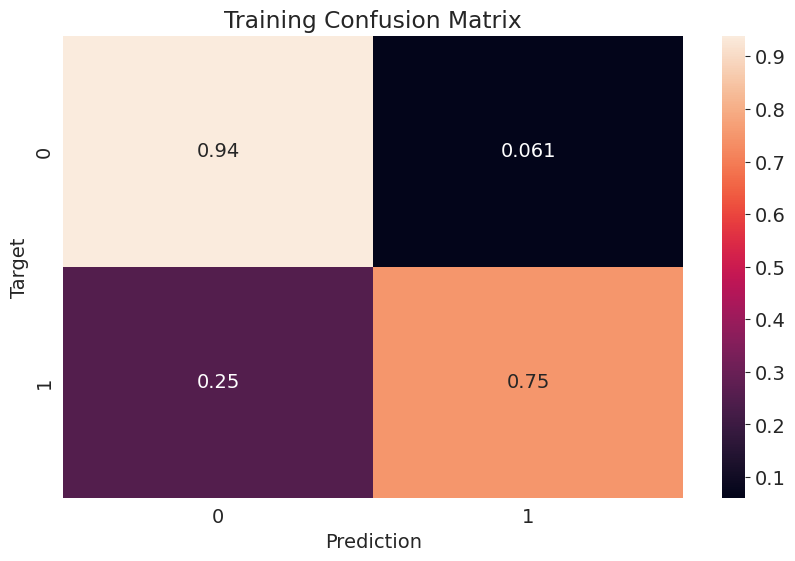

In [ ]:
predict_and_plot(train_input[numerical_cols+encoded_cols],train_target,'Training')

In [ ]:
def all_no(inputs):
    return np.full(len(inputs), 0)

In [ ]:
accuracy_score(test_target, all_no(X_test))

0.7766666666666666